In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import utils
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.model_selection import train_test_split 
from skimage.transform import rotate, AffineTransform, warp
import cv2

In [ ]:
csv_file = "C:/Users/Gaurav Rai/emotion/aithon2020-level-2/data/aithon2020_level2_traning.csv"

In [ ]:
df=pd.read_csv(csv_file)

In [ ]:
df.head()

In [ ]:
y = df["emotion"]

In [6]:
y.value_counts()

Happy    4809
Sad      3271
Fear     2737
Name: emotion, dtype: int64

In [7]:
y.dtype

dtype('O')

In [8]:
Total_data = df.drop('emotion', axis = 1, inplace = False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Columns: 2305 entries, emotion to pixel_2303
dtypes: int64(2304), object(1)
memory usage: 190.2+ MB


In [10]:
df.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
count,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,...,10817.000000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000
mean,118.221226,115.735971,113.181011,110.977720,109.471665,108.415365,107.585837,107.428677,108.106499,109.431450,...,109.256818,108.19155,107.904040,108.256171,108.602385,108.757419,109.088934,110.110104,110.900619,111.588241
std,80.627366,79.328540,78.113478,76.858848,75.403813,73.958556,72.710462,71.377412,70.137667,69.125341,...,69.442170,70.41574,71.164821,72.138673,73.280819,74.139308,74.994528,75.752526,76.365650,76.877954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,45.000000,44.000000,44.000000,44.000000,44.000000,45.000000,45.000000,47.000000,50.000000,...,49.000000,46.00000,45.000000,44.000000,43.000000,42.000000,42.000000,42.000000,42.000000,42.000000
50%,108.000000,105.000000,102.000000,99.000000,98.000000,97.000000,96.000000,98.000000,100.000000,103.000000,...,105.000000,103.00000,102.000000,102.000000,101.000000,102.000000,101.000000,101.000000,102.000000,102.000000
75%,189.000000,183.000000,178.000000,173.000000,170.000000,167.000000,165.000000,164.000000,163.000000,164.000000,...,163.000000,163.00000,163.000000,165.000000,168.000000,170.000000,172.000000,174.000000,174.000000,177.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
df.dtypes

emotion       object
pixel_0        int64
pixel_1        int64
pixel_2        int64
pixel_3        int64
               ...  
pixel_2299     int64
pixel_2300     int64
pixel_2301     int64
pixel_2302     int64
pixel_2303     int64
Length: 2305, dtype: object

In [12]:
Total_data_m = Total_data.values

In [13]:
X_data = []
for rows in Total_data_m:
    X_data.append(np.array(rows, 'float32'))

In [14]:
np.asarray(X_data).shape

(10817, 2304)

In [15]:
X_data[0]

array([231., 212., 156., ...,  88., 110., 152.], dtype=float32)

In [16]:
Y_data = y.values

In [17]:
type(Y_data[0])

str

In [18]:
r_X_data = np.reshape(X_data, [-1, 48, 48])

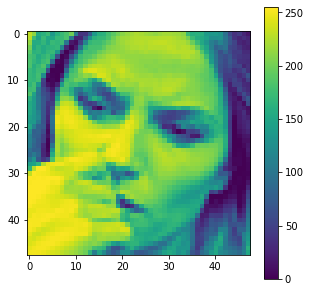

In [19]:
plt.figure(figsize = (5,5))
plt.imshow(r_X_data[0])
plt.colorbar()
plt.show()

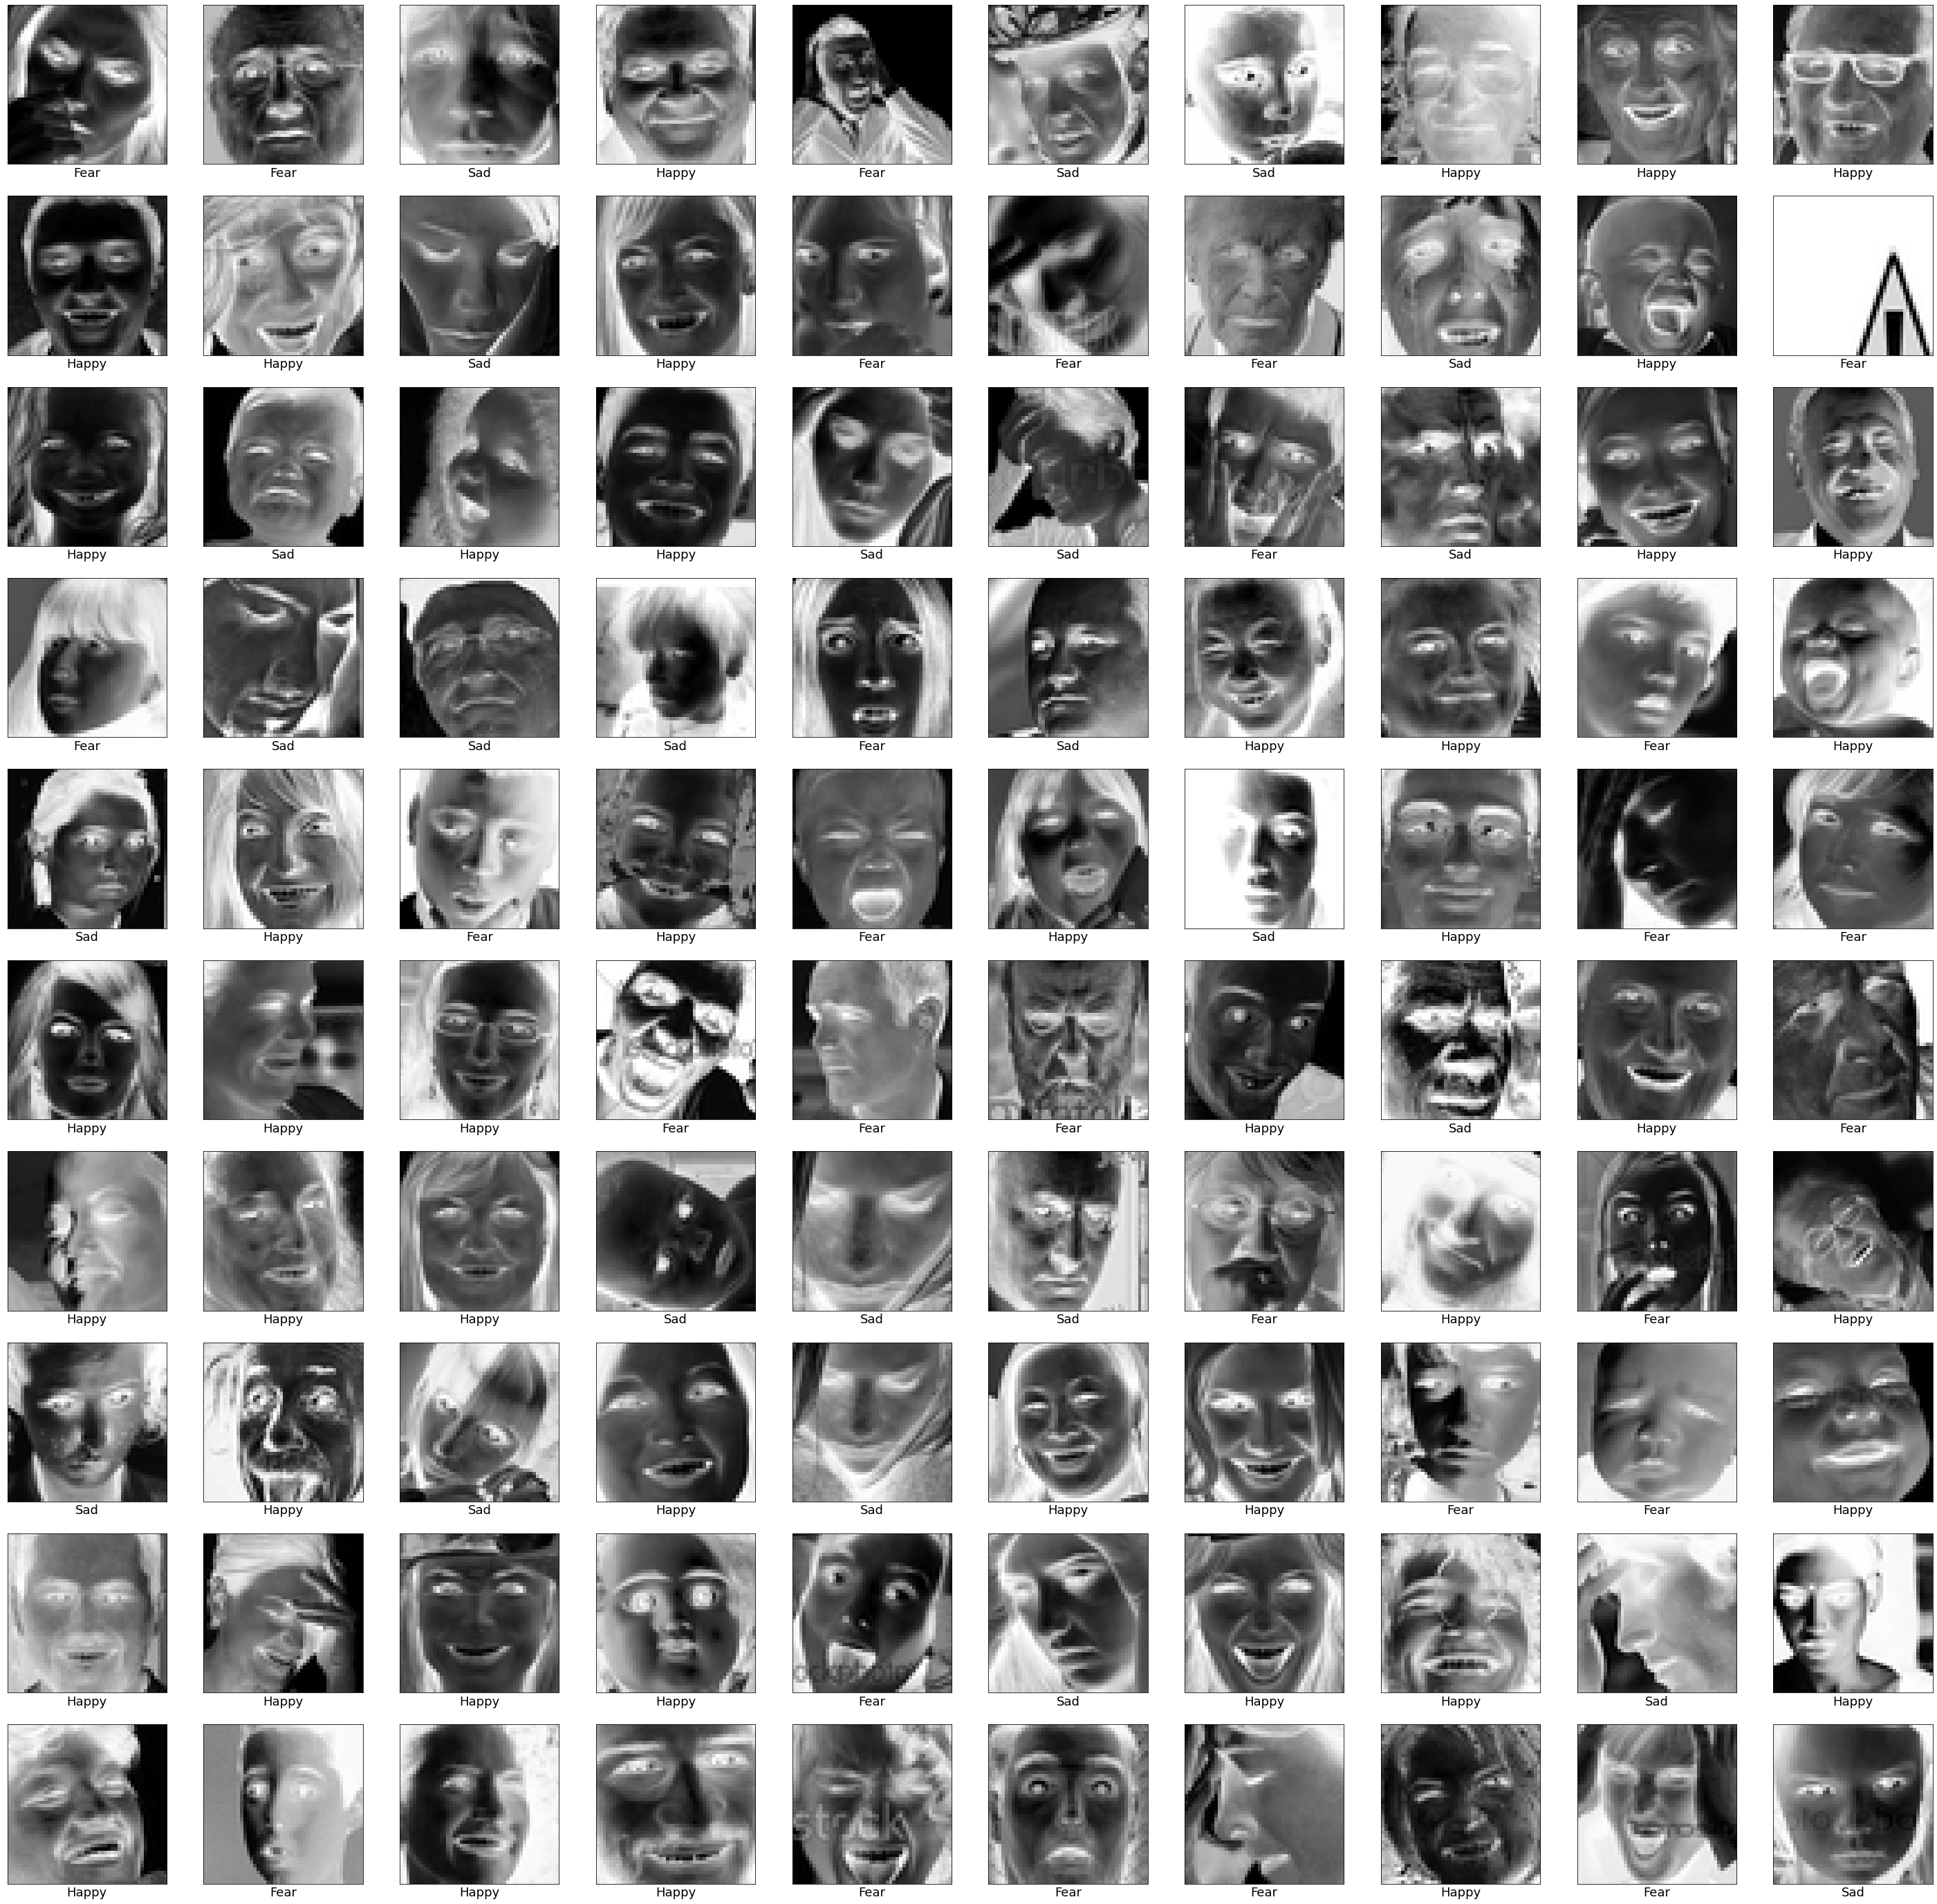

In [20]:
plt.figure(figsize=(50,50))

for i in range(0,100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(r_X_data[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_data[i]), fontsize=18)
plt.show()

In [21]:
r_X_data.shape


(10817, 48, 48)

In [22]:
Y_data_r = Y_data.reshape(-1,1)

In [23]:
def reflect_images(img):
    return np.fliplr(img)

def rotate2(img, deg = 45):
    return rotate(img, angle=deg)

def blur_img(img):
    return cv2.GaussianBlur(img, (1,3), 0)

In [24]:
X_aug_ref = [reflect_images(i) for i in r_X_data]

In [25]:
X_aug_rot1 = [rotate2(i, 45) for i in r_X_data]

In [26]:
X_aug_rot2 = [rotate2(i, -45) for i in r_X_data]

In [27]:
X_aug_blur = [blur_img(i) for i in r_X_data]

In [28]:
X_t = np.concatenate((r_X_data, X_aug_blur, X_aug_ref, X_aug_rot1, X_aug_rot2), axis = 0)

In [29]:
X_t.shape

(54085, 48, 48)

In [30]:
enc = OHE()

In [31]:
yy = enc.fit_transform(Y_data_r).toarray()

In [32]:
yy.shape

(10817, 3)

In [33]:
Y_t = np.concatenate((yy,yy,yy,yy,yy), axis = 0)

In [34]:
Y_t.shape

(54085, 3)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y_t, test_size=0.18, random_state=1, stratify=Y_t, shuffle = True)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44349, 48, 48), (9736, 48, 48), (44349, 3), (9736, 3))

In [37]:
X_train = np.array(X_train,'float32')
Y_train = np.array(y_train)
X_test = np.array(X_test,'float32')
Y_test = np.array(y_test)

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [38]:
X_train = X_train/255.0
X_test = X_test/255.0

In [39]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [40]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0

In [42]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr = 0.0003),
              metrics=['accuracy'])

In [43]:
X_test2, X_val, Y_test2, y_val = train_test_split(X_test, Y_test, test_size=0.25, random_state=1, stratify=Y_test, shuffle = True)

In [44]:
X_test2.shape, X_val.shape, Y_test2.shape, y_val.shape

((7302, 48, 48, 1), (2434, 48, 48, 1), (7302, 3), (2434, 3))

In [45]:
#callback = tf.keras.callbacks.EarlyStopping(
#    monitor = 'val_acc', min_delta = 0.1, patience = 4, verbose=0, mode='auto', restore_best_weights = True, baseline = 0.96)

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=150,
          verbose=1,
          validation_data=(X_val,y_val),
          shuffle=True)

Train on 44349 samples, validate on 2434 samples
Epoch 1/150
44349/44349 [==============================] - 47s 1ms/sample - loss: 1.0625 - accuracy: 0.4545 - val_loss: 1.0507 - val_accuracy: 0.4737
Epoch 2/150
44349/44349 [==============================] - 35s 785us/sample - loss: 0.9853 - accuracy: 0.5114 - val_loss: 0.9120 - val_accuracy: 0.5616
Epoch 3/150
44349/44349 [==============================] - 34s 765us/sample - loss: 0.8553 - accuracy: 0.5902 - val_loss: 0.7925 - val_accuracy: 0.6216
Epoch 4/150
44349/44349 [==============================] - 34s 766us/sample - loss: 0.7633 - accuracy: 0.6434 - val_loss: 0.7374 - val_accuracy: 0.6537
Epoch 5/150
44349/44349 [==============================] - 33s 745us/sample - loss: 0.7027 - accuracy: 0.6750 - val_loss: 0.6831 - val_accuracy: 0.6886
Epoch 6/150
44349/44349 [==============================] - 33s 744us/sample - loss: 0.6487 - accuracy: 0.7061 - val_loss: 0.7101 - val_accuracy: 0.6828
Epoch 7/150
44349/44349 [================

44349/44349 [==============================] - 28s 630us/sample - loss: 0.0743 - accuracy: 0.9733 - val_loss: 0.9344 - val_accuracy: 0.8131
Epoch 55/150
44349/44349 [==============================] - 28s 626us/sample - loss: 0.0726 - accuracy: 0.9742 - val_loss: 1.0106 - val_accuracy: 0.8077
Epoch 56/150
44349/44349 [==============================] - 28s 627us/sample - loss: 0.0701 - accuracy: 0.9751 - val_loss: 0.9587 - val_accuracy: 0.8139
Epoch 57/150
44349/44349 [==============================] - 27s 616us/sample - loss: 0.0701 - accuracy: 0.9747 - val_loss: 0.9493 - val_accuracy: 0.8122
Epoch 58/150
44349/44349 [==============================] - 28s 622us/sample - loss: 0.0681 - accuracy: 0.9756 - val_loss: 0.9492 - val_accuracy: 0.8151
Epoch 59/150
44349/44349 [==============================] - 27s 619us/sample - loss: 0.0672 - accuracy: 0.9763 - val_loss: 0.9954 - val_accuracy: 0.8081
Epoch 60/150
44349/44349 [==============================] - 27s 620us/sample - loss: 0.0671 - a

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
accuracy = model.evaluate(x = X_test2, y = Y_test2, batch_size = 64)
print("Accuracy: ",accuracy[1])

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")


